In [6]:
%matplotlib inline

import pylab as pl
import enaml
import numpy as np

with enaml.imports():
    from psiaudio import stim
    from psiaudio.calibration import FlatCalibration
    from psi.controller.queue import FIFOSignalQueue
    from psi.controller.queue import InterleavedFIFOSignalQueue
    
calibration = FlatCalibration.as_attenuation()

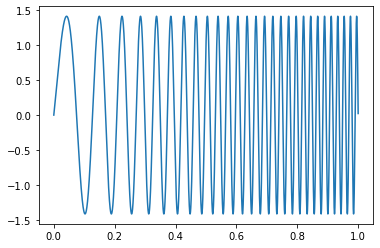

In [7]:
fs = 20000
t = np.arange(fs)/fs
chirp = stim.ChirpFactory(fs, 5, 50, 1, 0, calibration)
y = chirp.next(fs)
pl.plot(t, y)

In [9]:
noise = stim.BandlimitedNoiseFactory(fs, 0, 0, 100, 1000, 12, 1, 80, False, calibration)
noise_burst = stim.Cos2EnvelopeFactory(fs, 0, 0.25, 1, calibration, noise)

TypeError: __init__() takes from 5 to 6 positional arguments but 7 were given

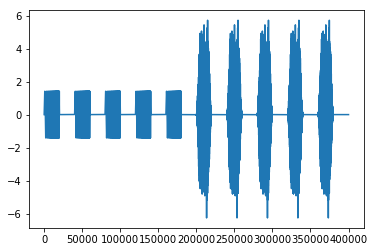

In [4]:
queue = FIFOSignalQueue(initial_delay=0)
queue.set_fs(fs)
queue.set_filter_delay(0)

queue.append(chirp, trials=5, delays=1)
queue.append(noise_burst, trials=5, delays=1)

y, complete = queue.pop_buffer(samples=fs*20)
pl.plot(y)

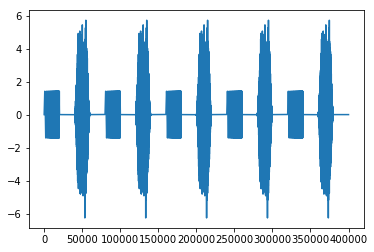

In [5]:
queue = InterleavedFIFOSignalQueue(initial_delay=0)
queue.set_fs(fs)
queue.set_filter_delay(0)

queue.append(chirp, trials=5, delays=1)
queue.append(noise_burst, trials=5, delays=1)

y, complete = queue.pop_buffer(samples=fs*20)
pl.plot(y)